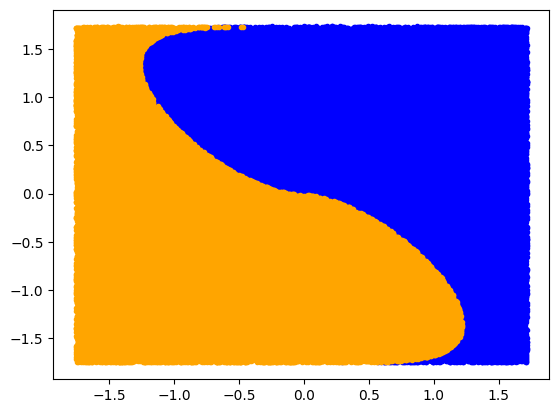

In [17]:
import synthetic_data
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


class QuinticContexts:

    def __init__(self):
        self.type = 'quintic'
        self.d = 5
        self.mean = None
        self.std = None

    def set_b(self, b):
        self.b = b

    def normalization(self,):
        all = []
        for _ in range(10000):
            c, d = self.get_context(False)
            all.append(c)
        all = np.array(all)
        self.mean = np.mean(all,0)
        self.std = np.std(all,0)   
        
    def get_context(self, normalize):

        sample = np.random.uniform(-1, 1, 2)
        x,y = sample 
        sample = np.concatenate([sample, np.random.normal(0,0.01,3) ])
        x = x + self.b
        decision_boundary = x**5 - y**5 + y**3 
        p =1 if decision_boundary >= 0 else 0

        sample = sample.reshape(1, len(sample) )
        val = [ p, 1-p ]
        if normalize:
            sample = ( sample - self.mean ) / self.std

        return sample , val 
    
    def decision_boundary_function(self, x, y, b=0):
        x = x + b
        decision_boundary = x**5 - y**5 + y**3
        return decision_boundary >= 0
    
    def denormalize(self,x):
        return (x+self.mean) * self.std 

context_generator = QuinticContexts()
context_generator.set_b(0)
context_generator.normalization()


donut_samples = []
other_samples = []
all = []
for _ in range(100000):
    c, d = context_generator.get_context(True )
    if d[0]>0.5:
        donut_samples.append(c)
    else:
        other_samples.append(c)

    all.append(c)

donut_samples = np.array(donut_samples).squeeze(1)
other_samples = np.array(other_samples).squeeze(1)
all = np.array(all).squeeze(1)

plt.plot(donut_samples[:,0], donut_samples[:,1], '.', color = 'blue')
plt.plot(other_samples[:,0], other_samples[:,1], '.', color = 'orange')

In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)) ])
#train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)
test_loader = list(test_loader)


class MNISTcontexts():

    def __init__(self, ):

        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)) ])
        #train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
        test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)
        self.test_loader = list(test_loader)
        self.index = 0
        x, y = self.test_loader[self.index]
        x = x.flatten()
        self.d = x.shape[0]

    def get_context(self,):
        
        x, y = self.test_loader[self.index]
        x = x.flatten()
        sample = x.numpy() #.reshape(1, -1)

        val = [0] * 10
        val[ y.item() ] = 1
        
        self.index += 1

        return sample , val 


In [7]:
import numpy as np
signal_matrices = [ np.array( [ [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] ] ), 

                        np.array( [ [1]*10 ] ), 
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] ),
                        np.array( [ [1]*10 ] )  ] 


TypeError: array() takes from 1 to 2 positional arguments but 10 were given

In [5]:


for i in range(100):
    x, y = test_loader[i]
    print(y.item())
    p = [0] * 10
    p[y] = 1
    print(p)

0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
3
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
5
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
9
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
2
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
3
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
2
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
5
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
4
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
9
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
5
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
2
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
8
[0, 0, 0

In [ ]:



class QuadraticContexts:

    def __init__(self):
        self.type = 'quadratic'
        self.d = 3
        self.mean = None
        self.std = None

    def set_b(self, b):
        self.b = b

    def normalization(self,):
        all = []
        for _ in range(100000):
            c, d = self.get_context(False)
            all.append(c)
        all = np.array(all)
        self.mean = np.mean(all,0)
        self.std = np.std(all,0)     
        
    def get_context(self, normalize):

        sample = np.random.uniform(-1, 1, 3)
        x,y,z = sample 
        
        decision_boundary = self.project_to_3d(x,y) - z

        p = 1 if decision_boundary >= 0 else 0

        sample = sample.reshape(1, len(sample) )
        val = [ p, 1-p ]
        if normalize:
            sample = ( sample - self.mean ) / self.std

        return sample , val 

    def project_to_3d(self, x, y):
        z = x**2 - self.b * y**2
        return z
    
    def denormalize(self,x):
        return (x+self.mean) * self.std 
    

In [ ]:
context_generator = QuadraticContexts()
context_generator.set_b(1)
context_generator.normalization()


donut_samples = []
other_samples = []
all = []
for _ in range(100000):
    c, d = context_generator.get_context(False )
    if d[0]>0.5:
        donut_samples.append(c)
    else:
        other_samples.append(c)

    all.append(c)

donut_samples = np.array(donut_samples).squeeze(1)
other_samples = np.array(other_samples).squeeze(1)
all = np.array(all).squeeze(1)

In [ ]:
import numpy as np
import plotly.graph_objects as go


x = np.outer(np.linspace(-1, 1, 50), np.ones(50))
y = x.copy().T

context_generator.set_b(1)
z1 = context_generator.project_to_3d(x, y)
context_generator.set_b(1/2)
z2 = context_generator.project_to_3d(x, y)

fig = go.Figure()

fig.add_trace( go.Surface(x=x, y=y, z=z1, opacity=1, colorscale = 'Tealgrn',  showscale=False, name='Surface A') )

fig.add_trace( go.Surface(x=x, y=y, z=z2, opacity=0.7, colorscale = 'Sunsetdark', showscale=False, name='Surface B') )

fig.add_trace( go.Scatter3d( x=donut_samples[:,0], y=donut_samples[:,1], z=donut_samples[:,2],
                mode='markers', marker=dict(size=1, colorscale='Viridis', opacity=0.8), name='Points' ) )

fig.add_trace( go.Scatter3d( x=other_samples[:,0], y=other_samples[:,1], z=other_samples[:,2],
                mode='markers', marker=dict(size=1, colorscale='Teal', opacity=0.8), name='Points' ) )

fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=10, range=[-1, 1]),
        yaxis=dict(nticks=10, range=[-1, 1]),
        zaxis=dict(nticks=10, range=[-1, 1]),
        aspectmode='cube',
        camera_eye={"x": -1.6, "y": -1.6, "z": 3/4}
    ),
    margin=dict(l=0, r=0, b=0, t=0),  # Set margin to zero for tight layout
    width=600,  # Set the width to 600 pixels
    height=600,  # Set the height to 600 pixels
    showlegend=True
)

fig.show()